## cancer data

In [38]:
# 读取 cancer 数据
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()
#取前7个特征
X = cancer_data.data[:,:7]
y = cancer_data.target
#后100 个为test
t = len(y)-100
X_train = X[:t]
y_train = y[:t]
X_test = X[t:]
y_test = y[t:]

## 基础

### 开发机器学习应用程序的步骤

(1) 收集数据。我们可以使用很多方法收集样本数据，
  如：制作网络爬虫从网站上抽取数据、从RSS反馈或者API中得到信息、设备发送过来的实测数据（风速、血糖等）。  
  提取数据的方法非常多，为了节省时间与精力，可以使用公开可用的数据源。

(2) 准备输入数据。得到数据之后，还必须确保数据格式符合要求，  
此外还需要为机器学习算法准备特定的数据格式，如某些算法要求特征值使用特定的格式，
一些算法要求目标变量和特征值是字符串类型，而另一些算法则可能要求是整数类型。后续章节

(3) 分析输入数据。此步骤主要是人工分析以前得到的数据。为了确保前两步有效，最简单
的方法是用文本编辑器打开数据文件，查看得到的数据是否为空值。此外，还可以进一步浏览数  
据，分析是否可以识别出模式；数据中是否存在明显的异常值，如某些数据点与数据集中的其他  
值存在明显的差异。  

(4) 训练算法。机器学习算法从这一步才真正开始学习。根据算法的不同，第4步和第5步是  
机器学习算法的核心。我们将前两步得到的格式化数据输入到算法，从中抽取知识或信息。这里  
得到的知识需要存储为计算机可以处理的格式，方便后续步骤使用。  

(5) 测试算法。这一步将实际使用第4步机器学习得到的知识信息。为了评估算法，必须测试算  
法工作的效果。对于监督学习，必须已知用于评估算法的目标变量值；对于无监督学习，也必须用  
其他的评测手段来检验算法的成功率。无论哪种情形，如果不满意算法的输出结果，则可以回到第  
4步，改正并加以测试。问题常常会跟数据的收集和准备有关，这时你就必须跳回第1步重新开始。  

(6) 使用算法。将机器学习算法转换为应用程序，执行实际任务，以检验上述步骤是否可以  
在实际环境中正常工作。此时如果碰到新的数据问题，同样需要重复执行上述的步骤。  

## KNN

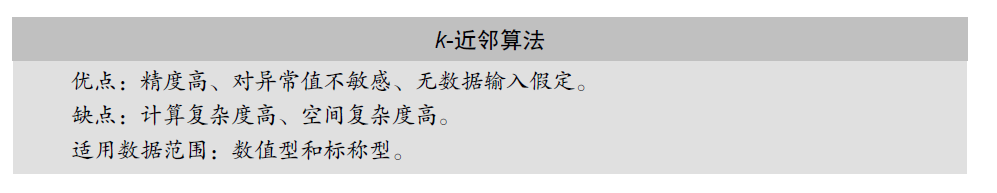

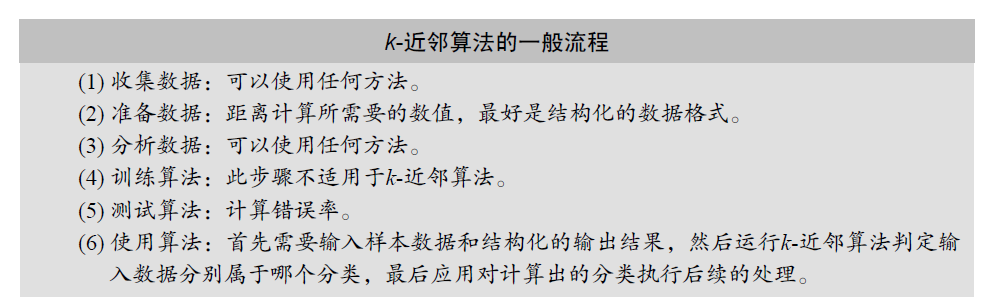

### 约会数据分类

In [2]:
import numpy as np
import pandas as pd

In [54]:
with open('E:/1学习\Machine Learning/pdf/MLinAction/MLiA_SourceCode/machinelearninginaction/Ch02/datingTestSet.txt', 'r') as file1:
    Lines = file1.readlines()
    row = len(Lines)
    data = np.zeros((row, 3))
    Label = []
    index = 0
    for line in Lines:
        line = line.strip() #去掉换行符\n
        lst = line.split("\t")
        data[index] = lst[0:3]
        if lst[-1] == 'didntLike':
            Label.append(1)
        elif lst[-1] == 'smallDoses':
            Label.append(2)
        else:
            Label.append(3)
        index += 1


In [30]:
# 归一化，使每一列 减均值 / 标准差
mean = data.mean(0)
std = data.std(0)
data = data - mean
data = data / std

In [41]:
train_set = 800
train_data = data[:train_set]
train_label = Label[:train_set]

test_data = data[train_set:]
test_label = Label[train_set:]

In [35]:
from sklearn import neighbors

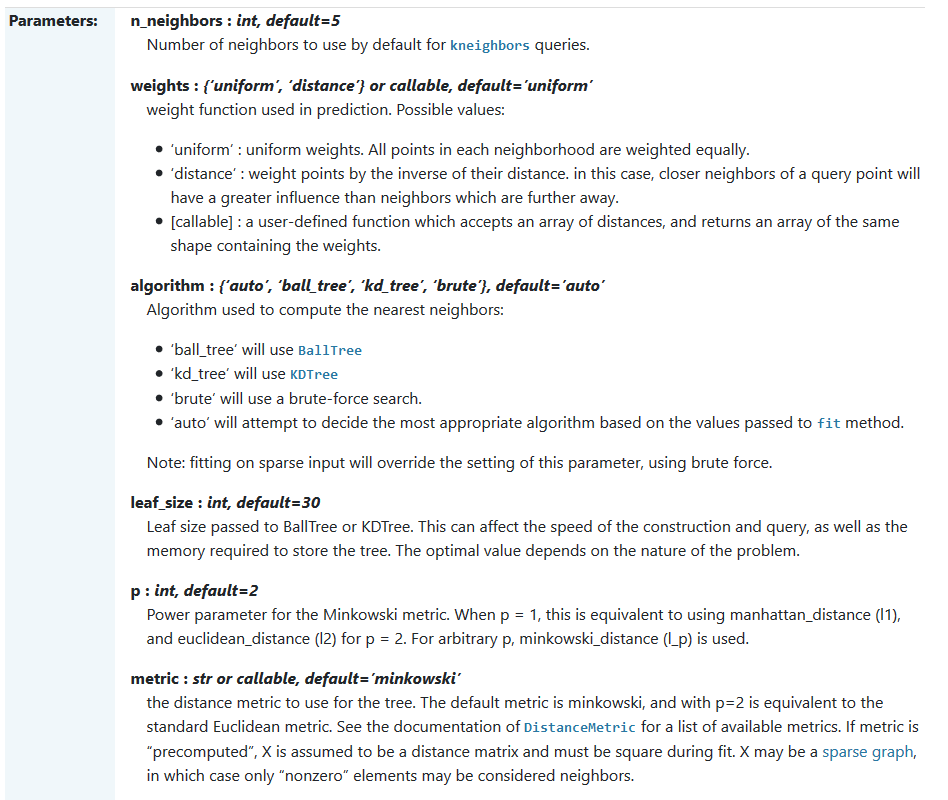

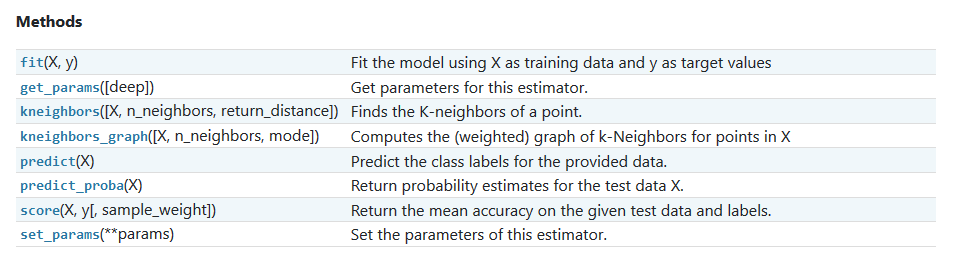

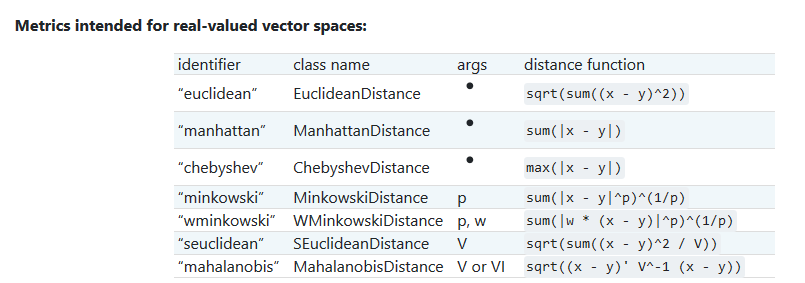

In [44]:
KNN_model = neighbors.KNeighborsClassifier(n_neighbors=10, weights='uniform', algorithm='kd_tree', metric='euclidean')

In [45]:
KNN_model.fit(train_data, train_label)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [47]:
#计算 train 上的误差
pre_label = KNN_model.predict(train_data)
loss = sum(pre_label == train_label) / len(train_label)
print(loss)

0.95875


In [48]:
#test 上的误差
pre_label = KNN_model.predict(test_data)
loss = sum(pre_label == test_label) / len(test_label)
print(loss)

0.935


### 手写识别

In [62]:
import os
os.chdir('E:/1学习/Machine Learning/pdf/MLinAction/MLiA_SourceCode/machinelearninginaction/Ch02/digits/trainingDigits')

In [94]:
train_file_list = os.listdir()
row = len(train_file_list)
Train_data = np.zeros((row, 1024))
Train_label = []

In [95]:
idx = 0
for file in train_file_list:
    vect = np.zeros((1, 1024))
    Train_label.append(int(file[0]))
    
    fr = open(file)
    for i in range(32):
        line = fr.readline()
        for j in range(32):
            vect[0, 32*i+j] = int(line[j])
    Train_data[idx] = vect
    idx += 1
    fr.close()

In [96]:
len(Train_data)

1934

In [97]:
len(Train_label)

1934

In [100]:
from sklearn import neighbors
KNN_model_1 = neighbors.KNeighborsClassifier(n_neighbors=50, weights='uniform', algorithm='kd_tree', metric='manhattan')
KNN_model_1.fit(Train_data, Train_label)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=50, p=2,
           weights='uniform')

In [101]:
KNN_model_2 = neighbors.KNeighborsClassifier(n_neighbors=50, weights='distance', algorithm='kd_tree', metric='manhattan')
KNN_model_2.fit(Train_data, Train_label)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=50, p=2,
           weights='distance')

In [102]:
#使用欧氏距离的 训练误差
pred_1 = KNN_model_1.predict(Train_data)
loss_1 = sum(pred_1 == Train_label) / len(pred_1)
print(loss_1)

0.9415718717683558


In [103]:
#曼哈顿距离的 训练误差
pred_2 = KNN_model_2.predict(Train_data)
loss_2 = sum(pred_2 == Train_label) / len(pred_2)
print(loss_2)

1.0


In [105]:
os.chdir('E:/1学习/Machine Learning/pdf/MLinAction/MLiA_SourceCode/machinelearninginaction/Ch02/digits/testDigits')
test_file_list = os.listdir()

In [106]:
len(test_file_list)

946

In [107]:
row = len(test_file_list)
test_data = np.zeros((row, 1024))
test_label = []
idx = 0
for file in test_file_list:
    vect = np.zeros((1, 1024))
    test_label.append(int(file[0]))
    
    fr = open(file)
    for i in range(32):
        line = fr.readline()
        for j in range(32):
            vect[0, 32*i+j] = int(line[j])
    test_data[idx] = vect
    idx += 1
    fr.close()

In [108]:
len(test_label)

946

In [109]:
len(test_data)

946

In [111]:
#使用欧氏距离的 test误差
pred_1 = KNN_model_1.predict(test_data)
loss_1 = sum(pred_1 == test_label) / len(pred_1)
print(loss_1)

0.945031712473573


In [112]:
#曼哈顿距离的 训练误差
pred_2 = KNN_model_2.predict(test_data)
loss_2 = sum(pred_2 == test_label) / len(pred_2)
print(loss_2)

0.952431289640592


## SVM

### 线性SVM / iris 2维

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [41]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica

In [44]:
svm_clf = Pipeline([
#("scaler", StandardScaler()),
("linear_svc", LinearSVC(C=1, loss="squared_hinge"))
])
svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [45]:
sum(svm_clf.predict(X) == y) / len(y)

0.96

### 线性SVM / iris 4维

In [46]:
iris = datasets.load_iris()
X = iris["data"]
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica

In [54]:
svm_clf = Pipeline([
("scaler", StandardScaler()),
("linear_svc", LinearSVC(C=1, loss="hinge"))
])
svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [55]:
sum(svm_clf.predict(X) == y) / len(y)

0.9733333333333334

## DecisionTree

In [4]:
import numpy as np
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

In [5]:
iris = datasets.load_iris()
X = iris["data"]
y = (iris["target"])

In [6]:
test_idx = [0,1,2,3,4] + [50,51,52,53,54] + [100,101,102,103,104]
X_test = X[test_idx]
y_test = y[test_idx]

In [7]:
train_idx = [i for i in range(150) if i not in test_idx]
X_train = X[train_idx]
y_train = y[train_idx]

In [8]:
DT = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split=2,min_samples_leaf=1,min_impurity_decrease=0.0)

In [9]:
DT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
pre_train = DT.predict(X_train)
loss = sum(pre_train == y_train) / len(y_train)
print(loss)

0.9925925925925926


In [15]:
accuracy_score(y_train, pre_train)

0.9925925925925926

In [10]:
pre_test = DT.predict(X_test)
loss = sum(pre_test == y_test) / len(y_test)
print(loss)

1.0


In [11]:
from sklearn.metrics import accuracy_score

In [12]:
accuracy_score(y_test, pre_test)

1.0

## Ensemble Learning

### Voting Classifier

In [44]:
# 读取 cancer 数据
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()
#取前7个特征
X = cancer_data.data[:,:7]
y = cancer_data.target
#后100 个为test
t = len(y)-100
X_train = X[:t]
y_train = y[:t]
X_test = X[t:]
y_test = y[t:]

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [45]:
log_clf = LogisticRegression()
svm_clf = LinearSVC(C=1, loss="hinge")
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_split=2,min_samples_leaf=1,min_impurity_decrease=0.1)

In [46]:
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('svm', svm_clf), ('dt', dt_clf)], voting='hard')

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
for clf in (log_clf, svm_clf, dt_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.92
LinearSVC 0.58
DecisionTreeClassifier 0.92
VotingClassifier 0.9


In [49]:
for clf in (log_clf, svm_clf, dt_clf, voting_clf):
    y_pred = clf.predict(X_train)
    print(clf.__class__.__name__, accuracy_score(y_train, y_pred))

LogisticRegression 0.9211087420042644
LinearSVC 0.6588486140724946
DecisionTreeClassifier 0.8848614072494669
VotingClassifier 0.9168443496801706


### bagging

In [52]:
# 读取 cancer 数据
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()
#取前7个特征
X = cancer_data.data[:,:7]
y = cancer_data.target
#后100 个为test
t = len(y)-100
X_train = X[:t]
y_train = y[:t]
X_test = X[t:]
y_test = y[t:]

In [53]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [67]:
n_estimators = 15
bag_clf = BaggingClassifier(
DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_split=2,min_samples_leaf=1,min_impurity_decrease=0.0), 
n_estimators=n_estimators,
max_samples=1.0, 
bootstrap=True, n_jobs=-1,
oob_score=True
)
# n_estimators 树的个数，  max_samples重抽样个数 , oob_score  没被抽到的样本的评价

In [68]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=15, n_jobs=-1, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [69]:
bag_clf.oob_score_

0.9339019189765458

In [57]:
#n_estimators = 10， max_depth=5
pred = bag_clf.predict(X_train)
loss = accuracy_score(pred, y_train)
print('训练误差：' + str(loss))

训练误差：0.9850746268656716


In [58]:
#n_estimators = 10， max_depth=5
pred = bag_clf.predict(X_test)
loss = accuracy_score(pred, y_test)
print('测试误差：' + str(loss))

测试误差：0.91


In [61]:
#n_estimators = 20， max_depth=6
pred = bag_clf.predict(X_train)
loss = accuracy_score(pred, y_train)
print('训练误差：' + str(loss))

训练误差：0.9914712153518124


In [62]:
#n_estimators = 20， max_depth=6
pred = bag_clf.predict(X_test)
loss = accuracy_score(pred, y_test)
print('测试误差：' + str(loss))

测试误差：0.91


### random forest

In [71]:
# 读取 cancer 数据
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()
#取前7个特征
X = cancer_data.data[:,:7]
y = cancer_data.target
#后100 个为test
t = len(y)-100
X_train = X[:t]
y_train = y[:t]
X_test = X[t:]
y_test = y[t:]

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [81]:
n_estimators = 20
rf_clf = RandomForestClassifier(
max_depth=5,
criterion='gini',
n_estimators=n_estimators,
#max_samples=1.0, 
bootstrap=True,
oob_score=True,
n_jobs=-1,
max_features=2 
)

In [82]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [83]:
rf_clf.oob_score_

0.9424307036247335

In [84]:
pred = rf_clf.predict(X_test)
loss = accuracy_score(pred, y_test)
print('测试误差：' + str(loss))

测试误差：0.94


### GBDT(classifier)

In [85]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [86]:
# 读取 cancer 数据
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()
#取前7个特征
X = cancer_data.data[:,:7]
y = cancer_data.target
#后100 个为test
t = len(y)-100
X_train = X[:t]
y_train = y[:t]
X_test = X[t:]
y_test = y[t:]

In [93]:
gb_clf = GradientBoostingClassifier(
learning_rate=0.1,
n_estimators=100,
max_depth=5,
)

In [94]:
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [95]:
pred = gb_clf.predict(X_test)
loss = accuracy_score(pred, y_test)
print('测试误差：' + str(loss))

测试误差：0.94


### XGboost

In [2]:
import xgboost as xgb
import numpy as np

In [1]:
# 读取 cancer 数据
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()
#取前7个特征
X = cancer_data.data[:,:7]
y = cancer_data.target
#后100 个为test
t = len(y)-100
X_train = X[:t]
y_train = y[:t]
X_test = X[t:]
y_test = y[t:]

In [3]:
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

In [50]:
def myeval(pred, dtrain):
    
    y = dtrain.get_label()
    for i in range(len(pred)):
        if pred[i] >= 0.5:
            pred[i] = 1
        else:
            pred[i] = 0
    return 'myerror', sum(y == pred) / len(y)
    

In [51]:
num_round = 50

watchlist = [(dtrain, 'train'), (dtest, 'test')]
params={
'booster':'gbtree',
'objective': 'binary:logistic',#逻辑回归
'eval_metric':'error',#loss func
'gamma':0,  # 在树的叶子节点下一个分区的最小损失，越大算法模型越保守 。[0:]
'max_depth':6, # 构建树的深度 [1:]
'eta': 0.1, # 如同学习率
'lambda': 1,
'subsample':1
}
xgb_model = xgb.train(params, dtrain, num_boost_round=num_round, evals=watchlist, feval=myeval)

[0]	train-error:0.03625	test-error:0.07000	train-myerror:0.40298	test-myerror:0.23000
[1]	train-error:0.03411	test-error:0.06000	train-myerror:0.40298	test-myerror:0.23000
[2]	train-error:0.02985	test-error:0.06000	train-myerror:0.82942	test-myerror:0.66000
[3]	train-error:0.02985	test-error:0.05000	train-myerror:0.93390	test-myerror:0.87000
[4]	train-error:0.02985	test-error:0.06000	train-myerror:0.94030	test-myerror:0.85000
[5]	train-error:0.02985	test-error:0.05000	train-myerror:0.95949	test-myerror:0.90000
[6]	train-error:0.02772	test-error:0.06000	train-myerror:0.96162	test-myerror:0.88000
[7]	train-error:0.02985	test-error:0.06000	train-myerror:0.97868	test-myerror:0.92000
[8]	train-error:0.02559	test-error:0.06000	train-myerror:0.97868	test-myerror:0.93000
[9]	train-error:0.02559	test-error:0.06000	train-myerror:0.97655	test-myerror:0.93000
[10]	train-error:0.02132	test-error:0.06000	train-myerror:0.97655	test-myerror:0.93000
[11]	train-error:0.01706	test-error:0.05000	train-mye

In [52]:
pred = xgb_model.predict(dtest)
sum((pred>=0.5) == y_test) / len(y_test)

0.96